## Ames Data Set

Qual estudante de Dados nunca utilizou o Ames DataSet? ;)

Este dataset está no Kaggle ([AQUI](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)) e o utilizarei para:

1. Realizar tratamento de Outliers.
2. Realizar tratamento de Missing Data.
3. Realizar tratamento de Categorical Data.
4. Implementar um Modelo de Machine Learning que seja capaz de retornar o valor de uma casa.

# Tratando Outliers

# Importando bibliotecas

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importando o dataset e vendo as primeiras linhas:

In [20]:
df = pd.read_csv("../data_input/ames.csv")

In [21]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Heatmap:

/tmp/ipykernel_36519/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

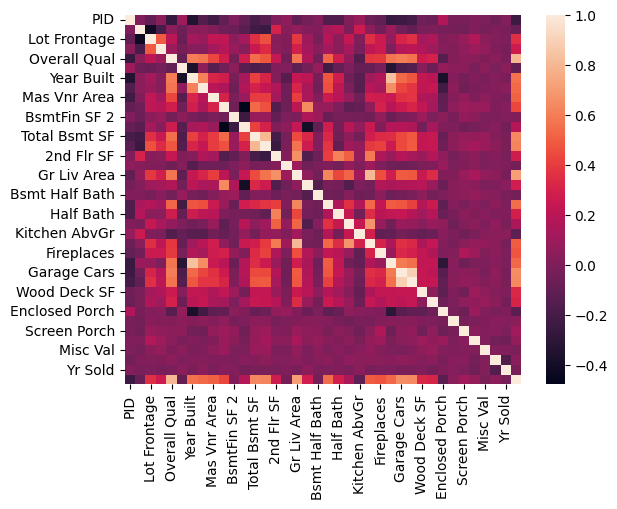

In [22]:
sns.heatmap(df.corr())

#### Como o objetivo é criar um modelo de ML capaz de retornar o valor de uma casa, analiso a correlação do Preço de Venda com os outros campos. Fazendo isso, descobri que o 'Overall Qual' é o campo que mais impacta no valor de uma casa.

In [23]:
df.corr()['SalePrice'].sort_values()

/tmp/ipykernel_36519/4269891110.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalePrice'].sort_values()


PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

### Utilizo um plot de distribuição para ver qual é "o preço mais comum" do meu dataset:

/tmp/ipykernel_36519/4143324588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SalePrice"])


<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

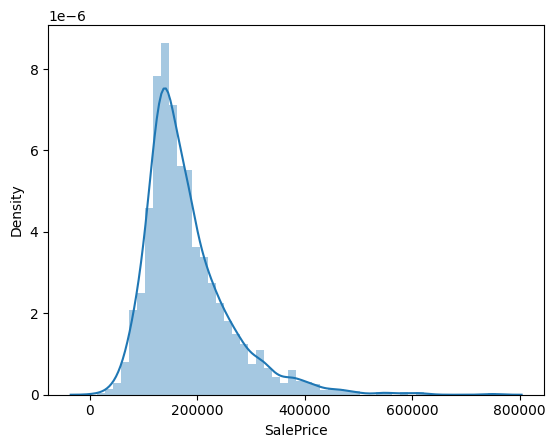

In [24]:
sns.distplot(df["SalePrice"])

### Tendo em vista que descobri a grande correlação entre ['Overall Qual', 'Gr Liv Area'] e 'SalePrice', através de um gráfico de dispersão, primeiramente, busco identificar qual casa possui alto 'Overall Qual' e baixo 'SalePrice':

<AxesSubplot: xlabel='Overall Qual', ylabel='SalePrice'>

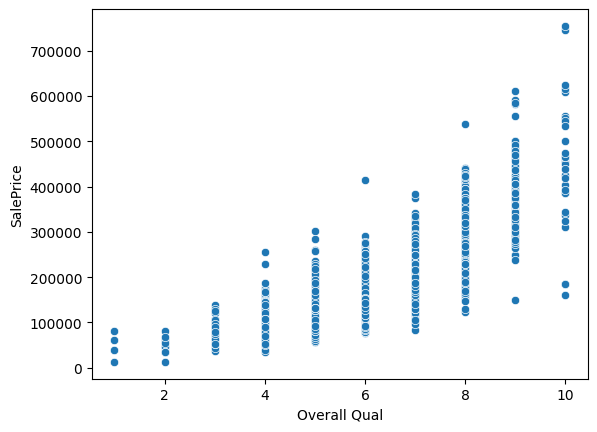

In [25]:
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df)

### Aqui, tendo em vista o gráfico de dispersão acima, opto por identificar e, posteriormente excluir, os pontos que possuem alto "Overall Qual' e baixo 'SalePrice', por entender que estes pontos são outliers. 

###### Observação: Fica aqui o comunicado que este é um exercício de estudos. Assim, NÃO É OBJETIVADO com este dataset e com o tratamento realizado por mim, criar um modelo de Machine Learning que irá para Produção. O grande objetivo aqui é mostrar de forma resumida como eu utilizaria as bibliotecas importadas.

In [26]:
df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


### De forma análoga, agora, busco identificar qual casa possui alto 'Gr Liv Area' e baixo 'SalePrice':

<AxesSubplot: xlabel='Gr Liv Area', ylabel='SalePrice'>

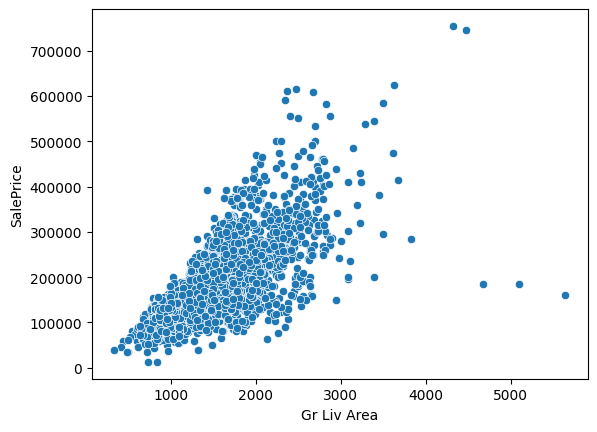

In [27]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

### Escolho retirar os 3 valores do gráfico acima que possuem alto  'Gr Liv Area' > 4000 e 'SalePrice' < 400000:

In [28]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


### Pego os índices destes três pontos (esta é uma outra forma de excluir linhas específicas):

In [29]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

Int64Index([1498, 2180, 2181], dtype='int64')

### E dropo:

In [30]:
ind_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [31]:
df = df.drop(ind_drop, axis=0)

### Como ficaram os gráficos de dispersão após a retirada dos outliers identificados:

<AxesSubplot: xlabel='Overall Qual', ylabel='SalePrice'>

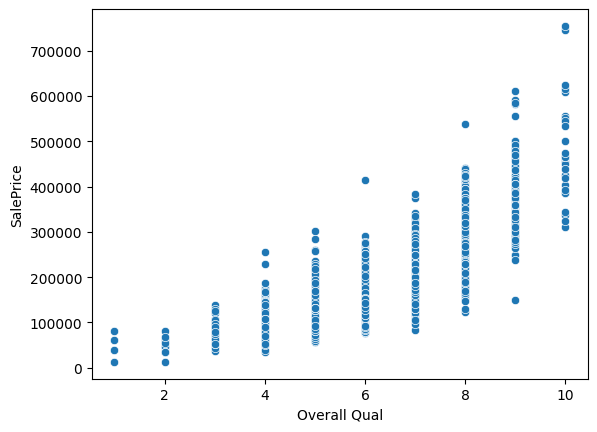

In [32]:
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df)

<AxesSubplot: xlabel='Gr Liv Area', ylabel='SalePrice'>

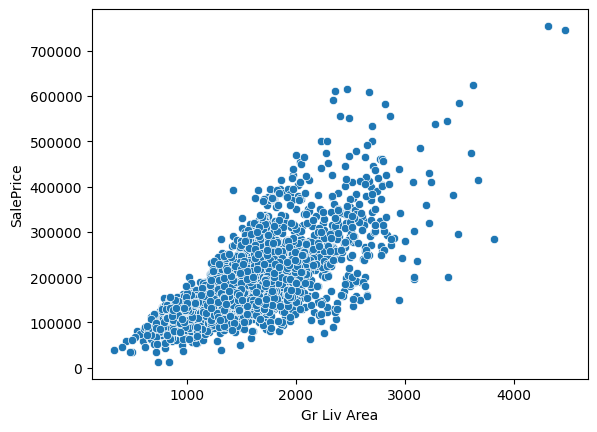

In [33]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

### Salvo o dataset, agora, sem os outliers dos dois campos que possuem maior correlação com o campo 'SalePrice':

In [34]:
df.to_csv("../data_output/ames_tratado_outliers.csv", index=False)
df.to_csv("../data_input/ames_tratado_outliers.csv", index=False)